## 5.3 Regression when X is a Binary Variable

- Instead of using a continuous regressor $X$, we might be interested in running the regression

\begin{equation}
Y_i = \beta_0 + \beta_1 D_i + u_i 
\end{equation}

- Where $D_i$ is a binary variable, a so-called dummy variable. For example, we may define $D_i$ as follows:

\begin{equation}
D_i = \begin{cases}
        1 \ \ \text{if $STR$ in $i^{th}$ school district < 20} \\
        0 \ \ \text{if $STR$ in $i^{th}$ school district $\geq$ 20} \\
      \end{cases}      
\end{equation}

- The use of a dummy variable completely changes the structure of the regression data.

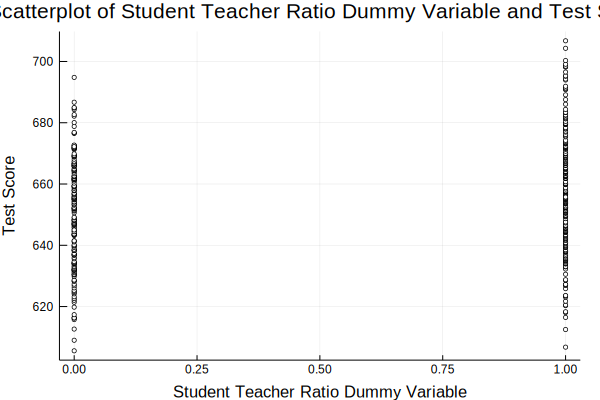

In [1]:
using FixedEffects #FixedEffectModels requires FixedEffects as a dependency
using FixedEffectModels #we use FixedEffectModels to create regression models
using CSV #we use the CSV package to load the data
using DataFrames #we use the DataFrames package as the data is stored as an object of type "DataFrame"
using Plots #we use the Plots package for generating plots

data = CSV.read("/mnt/juliabox/Econometrics With Julia/Datasets/CASchools.csv") #load the data into the workspace and store it in the variable "data"

data.student_teacher_ratio = data.students ./ data.teachers #add a new column "student_teacher_ratio" to the data, ./ is used to broadcast the division operator between arrays (or in this case, columns)
data.score = (data.read .+ data.math) ./ 2 #add a new column "score" to the data

data.student_teacher_ratio_less_than_twenty = data.student_teacher_ratio .< 20

x = data.student_teacher_ratio_less_than_twenty
y = data.score

p = plot( #assign a plot object to the variable p1 using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Scatterplot of Student Teacher Ratio Dummy Variable and Test Score", #plot title
    label = "", #legend labels
    xlabel = "Student Teacher Ratio Dummy Variable", #x axis label
    ylabel = "Test Score", #y axis label
    ms = 2, #marker size
    mc = :white #marker color
)

display(p)

- As it can be seen, With $D$ as the regressor, it is not useful to think of $\beta_1$ as a slope parameter since $D_i \in \{0,1\}$, i.e., we only observe two discrete values instead of a continuum of regressor values. 
- There is no continuous line depicting the conditional expectation function $E(TestScore_i | D_i)$ since this function is solely defined for x-positions 0 and 1.
- Therefore, the interpretation of the coefficients in this regression model is as follows:
 - $E(Y_i | D_i = 0) = \beta_0$, so $\beta_0$ is the expected test score in districts where $STR$ is greater than 20.
 - $E(Y_i | D_i = 1) = \beta_0 + \beta_1$ or, using the result above, $\beta_1 = E(Y_i | D_i = 1) - E(Y_i | D_i = 0)$. Thus,  $\beta_1$ is the difference in group specific expectations, i.e., the difference in expected test score between districts with $STR >= 20$ and those with $STR < 20$. 

In [3]:
using FixedEffects #FixedEffectModels requires FixedEffects as a dependency
using FixedEffectModels #we use FixedEffectModels to create regression models
using CSV #we use the CSV package to load the data
using DataFrames #we use the DataFrames package as the data is stored as an object of type "DataFrame"
using Plots #we use the Plots package for generating plots

data = CSV.read("/mnt/juliabox/Econometrics With Julia/Datasets/CASchools.csv") #load the data into the workspace and store it in the variable "data"

data.student_teacher_ratio = data.students ./ data.teachers #add a new column "student_teacher_ratio" to the data, ./ is used to broadcast the division operator between arrays (or in this case, columns)
data.score = (data.read .+ data.math) ./ 2 #add a new column "score" to the data

data.student_teacher_ratio_less_than_twenty = data.student_teacher_ratio .< 20

reg_mod = reg( #initialise a FixedEffectModel and define it as reg_mod
                        data, #pass the DataFrame 'data' as the dataset to be used in reg_mod
                        @formula(score ~ student_teacher_ratio_less_than_twenty) #pass the regression formula consisting of the dependent variable 'score' and the exogenous variable 'student_teacher_ratio'
)

println(reg_mod)

                                         Linear Model                                         
Number of obs:                             420   Degrees of freedom:                          2
R2:                                      0.035   R2 Adjusted:                             0.032
F Statistic:                           15.0731   p-value:                                 0.000
                                        Estimate Std.Error t value Pr(>|t|) Lower 95% Upper 95%
-----------------------------------------------------------------------------------------------
student_teacher_ratio_less_than_twenty   7.16944   1.84665 3.88241    0.000   3.53956   10.7993
(Intercept)                              650.077   1.39302 466.666    0.000   647.339   652.815



- One can see that the expected test score in districts with $STR < 20$ $(D_i = 1)$ is predicted to be $650.1 + 7.17 = 657.27$ while districts with $STR >= 20$ $(D_i = 0)$ are expected to have an average test score of only $650.1$.